## Loading and EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

In [2]:
df = pd.read_csv("data/Base.csv")
df

fraud_bool  income  name_email_similarity  prev_address_months_count  \
0                0     0.3               0.986506                         -1   
1                0     0.8               0.617426                         -1   
2                0     0.8               0.996707                          9   
3                0     0.6               0.475100                         11   
4                0     0.9               0.842307                         -1   
...            ...     ...                    ...                        ...   
999995           0     0.8               0.124690                         -1   
999996           0     0.9               0.824544                         -1   
999997           0     0.8               0.140891                         -1   
999998           0     0.9               0.002480                         52   
999999           0     0.6               0.993391                         -1   

        current_address_months_count  customer_age  days_since_request  \
0                                 25            40            0.006735   
1                                 89            20            0.010095   
2                                 14            40            0.012316   
3                                 14            30            0.006991   
4                                 29            40            5.742626   
...                              ...           ...                 ...   
999995                           143            30            0.051348   
999996                           193            30            0.009591   
999997                           202            10            0.059287   
999998                             3            30            0.023357   
999999                           174            30            0.020422   

        intended_balcon_amount payment_type  zip_count_4w  ...  \
0                   102.453711           AA          1059  ...   
1                    -0.849551           AD          1658  ...   
2                    -1.490386           AB          1095  ...   
3                    -1.863101           AB          3483  ...   
4                    47.152498           AA          2339  ...   
...                        ...          ...           ...  ...   
999995               -0.826239           AB           530  ...   
999996                0.008307           AC           408  ...   
999997               50.609995           AA           749  ...   
999998               -1.313387           AB           707  ...   
999999               14.942456           AA           655  ...   

        has_other_cards  proposed_credit_limit  foreign_request    source  \
0                     0                 1500.0                0  INTERNET   
1                     0                 1500.0                0  INTERNET   
2                     0                  200.0                0  INTERNET   
3                     0                  200.0                0  INTERNET   
4                     0                  200.0                0  INTERNET   
...                 ...                    ...              ...       ...   
999995                0                 1500.0                0  INTERNET   
999996                1                 1000.0                0  INTERNET   
999997                0                  200.0                0  INTERNET   
999998                0                  200.0                0  INTERNET   
999999                1                  200.0                0  INTERNET   

        session_length_in_minutes  device_os  keep_alive_session  \
0                       16.224843      linux                   1   
1                        3.363854      other                   1   
2                       22.730559    windows                   0   
3                       15.215816      linux                   1   
4                        3.743048      other                   0   
...                           ..

In [3]:
df['fraud_bool'] = df['fraud_bool'].astype('category')
df['payment_type'] = df['payment_type'].astype('category')
df['employment_status'] = df['employment_status'].astype('category')
df['email_is_free'] = df['email_is_free'].astype('category')
df['housing_status'] = df['housing_status'].astype('category')
df['phone_home_valid'] = df['phone_home_valid'].astype('category')
df['phone_mobile_valid'] = df['phone_mobile_valid'].astype('category')
df['has_other_cards'] = df['has_other_cards'].astype('category')
df['foreign_request'] = df['foreign_request'].astype('category')
df['source'] = df['source'].astype('category')
df['device_os'] = df['device_os'].astype('category')

In [4]:
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

fraud_bool : [0, 1]
Categories (2, int64): [0, 1]
income : [0.3 0.8 0.6 0.9 0.2 0.1 0.5 0.7 0.4]
name_email_similarity : [0.98650631 0.61742601 0.99670702 ... 0.14089138 0.00248024 0.99339133]
prev_address_months_count : [ -1   9  11  22  21  13  26  33  27  23   8  96  24  48  49  51 235 287
 152  90  20  31  10 203 106  52  53 189 140  99  46  55  30  36  29  87
  18 183 325  28 316  34  50  12  85  57  32 239 151 232 153  40 100  83
 154  25 288 182  38 103  98  92 174 144  62  56  78  43  82 166  73  95
  17 175  14 111  35 308  69 311  15  45  37  77  44  91  60 192  63 102
  97  74  89 293  88 123 209  47 238  41  58  19 190 127  84  54 181  86
 216 198  79 207 220 120 101 162 342 202 215 121 187 231 208 186 196  81
 242 122  42  94   7 304 116 107  70 273 197 265 226 195 188 143 185 164
  59 221 194  93  66 309 191 206 180 131 320 282 159 133 255  68 213  80
 201 218 268 296 104 298  39  61 214  67 105 155 237  16 125 200 135 228
 117 119 108 139 233 227 199 177 145 295  72 112 

In [5]:
cat_columns = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']

encoder = OneHotEncoder(sparse=False)
one_hot_encoded = encoder.fit_transform(df[cat_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(cat_columns))
df_encoded = pd.concat([df, one_hot_df], axis=1)
df_encoded = df_encoded.drop(cat_columns, axis=1)
df_encoded['fraud_bool'] = df_encoded.pop('fraud_bool')

In [6]:
df_encoded

income  name_email_similarity  prev_address_months_count  \
0          0.3               0.986506                         -1   
1          0.8               0.617426                         -1   
2          0.8               0.996707                          9   
3          0.6               0.475100                         11   
4          0.9               0.842307                         -1   
...        ...                    ...                        ...   
999995     0.8               0.124690                         -1   
999996     0.9               0.824544                         -1   
999997     0.8               0.140891                         -1   
999998     0.9               0.002480                         52   
999999     0.6               0.993391                         -1   

        current_address_months_count  customer_age  days_since_request  \
0                                 25            40            0.006735   
1                                 89            20            0.010095   
2                                 14            40            0.012316   
3                                 14            30            0.006991   
4                                 29            40            5.742626   
...                              ...           ...                 ...   
999995                           143            30            0.051348   
999996                           193            30            0.009591   
999997                           202            10            0.059287   
999998                             3            30            0.023357   
999999                           174            30            0.020422   

        intended_balcon_amount  zip_count_4w   velocity_6h  velocity_24h  ...  \
0                   102.453711          1059  13096.035018   7850.955007  ...   
1                    -0.849551          1658   9223.283431   5745.251481  ...   
2                    -1.490386          1095   4471.472149   5471.988958  ...   
3                    -1.863101          3483  14431.993621   6755.344479  ...   
4                    47.152498          2339   7601.511579   5124.046930  ...   
...                        ...           ...           ...           ...  ...   
999995               -0.826239           530   6732.602414   3010.048099  ...   
999996                0.008307           408   1574.293294   2716.495767  ...   
999997               50.609995           749   1258.864938   3601.322892  ...   
999998               -1.313387           707   7048.137128   6521.395012  ...   
999999               14.942456           655   3737.076479   3135.788094  ...   

        housing_status_BF  housing_status_BG  source_INTERNET  source_TELEAPP  \
0                     0.0                0.0              1.0             0.0   
1                     0.0                0.0              1.0             0.0   
2                     0.0                0.0              1.0             0.0   
3                     0.0                0.0              1.0             0.0   
4                     0.0                0.0              1.0             0.0   
...                   ...                ...              ...             ...   
999995                0.0                0.0              1.0             0.0   
999996                0.0                0.0              1.0             0.0   
999997                0.0                0.0              1.0             0.0   
999998                0.0                0.0              1.0             0.0   
999999                0.0                0.0              1.0             0.0   

       device_os_linux device_os_macintosh device_os_other  device_os_windows  \
0                  1.0                 0.0             0.0                0.0   
1                  0.0                 0.0             1.0                0.0   
2                  0.0                 0.0             0.0                1.0   
3                  1.0          

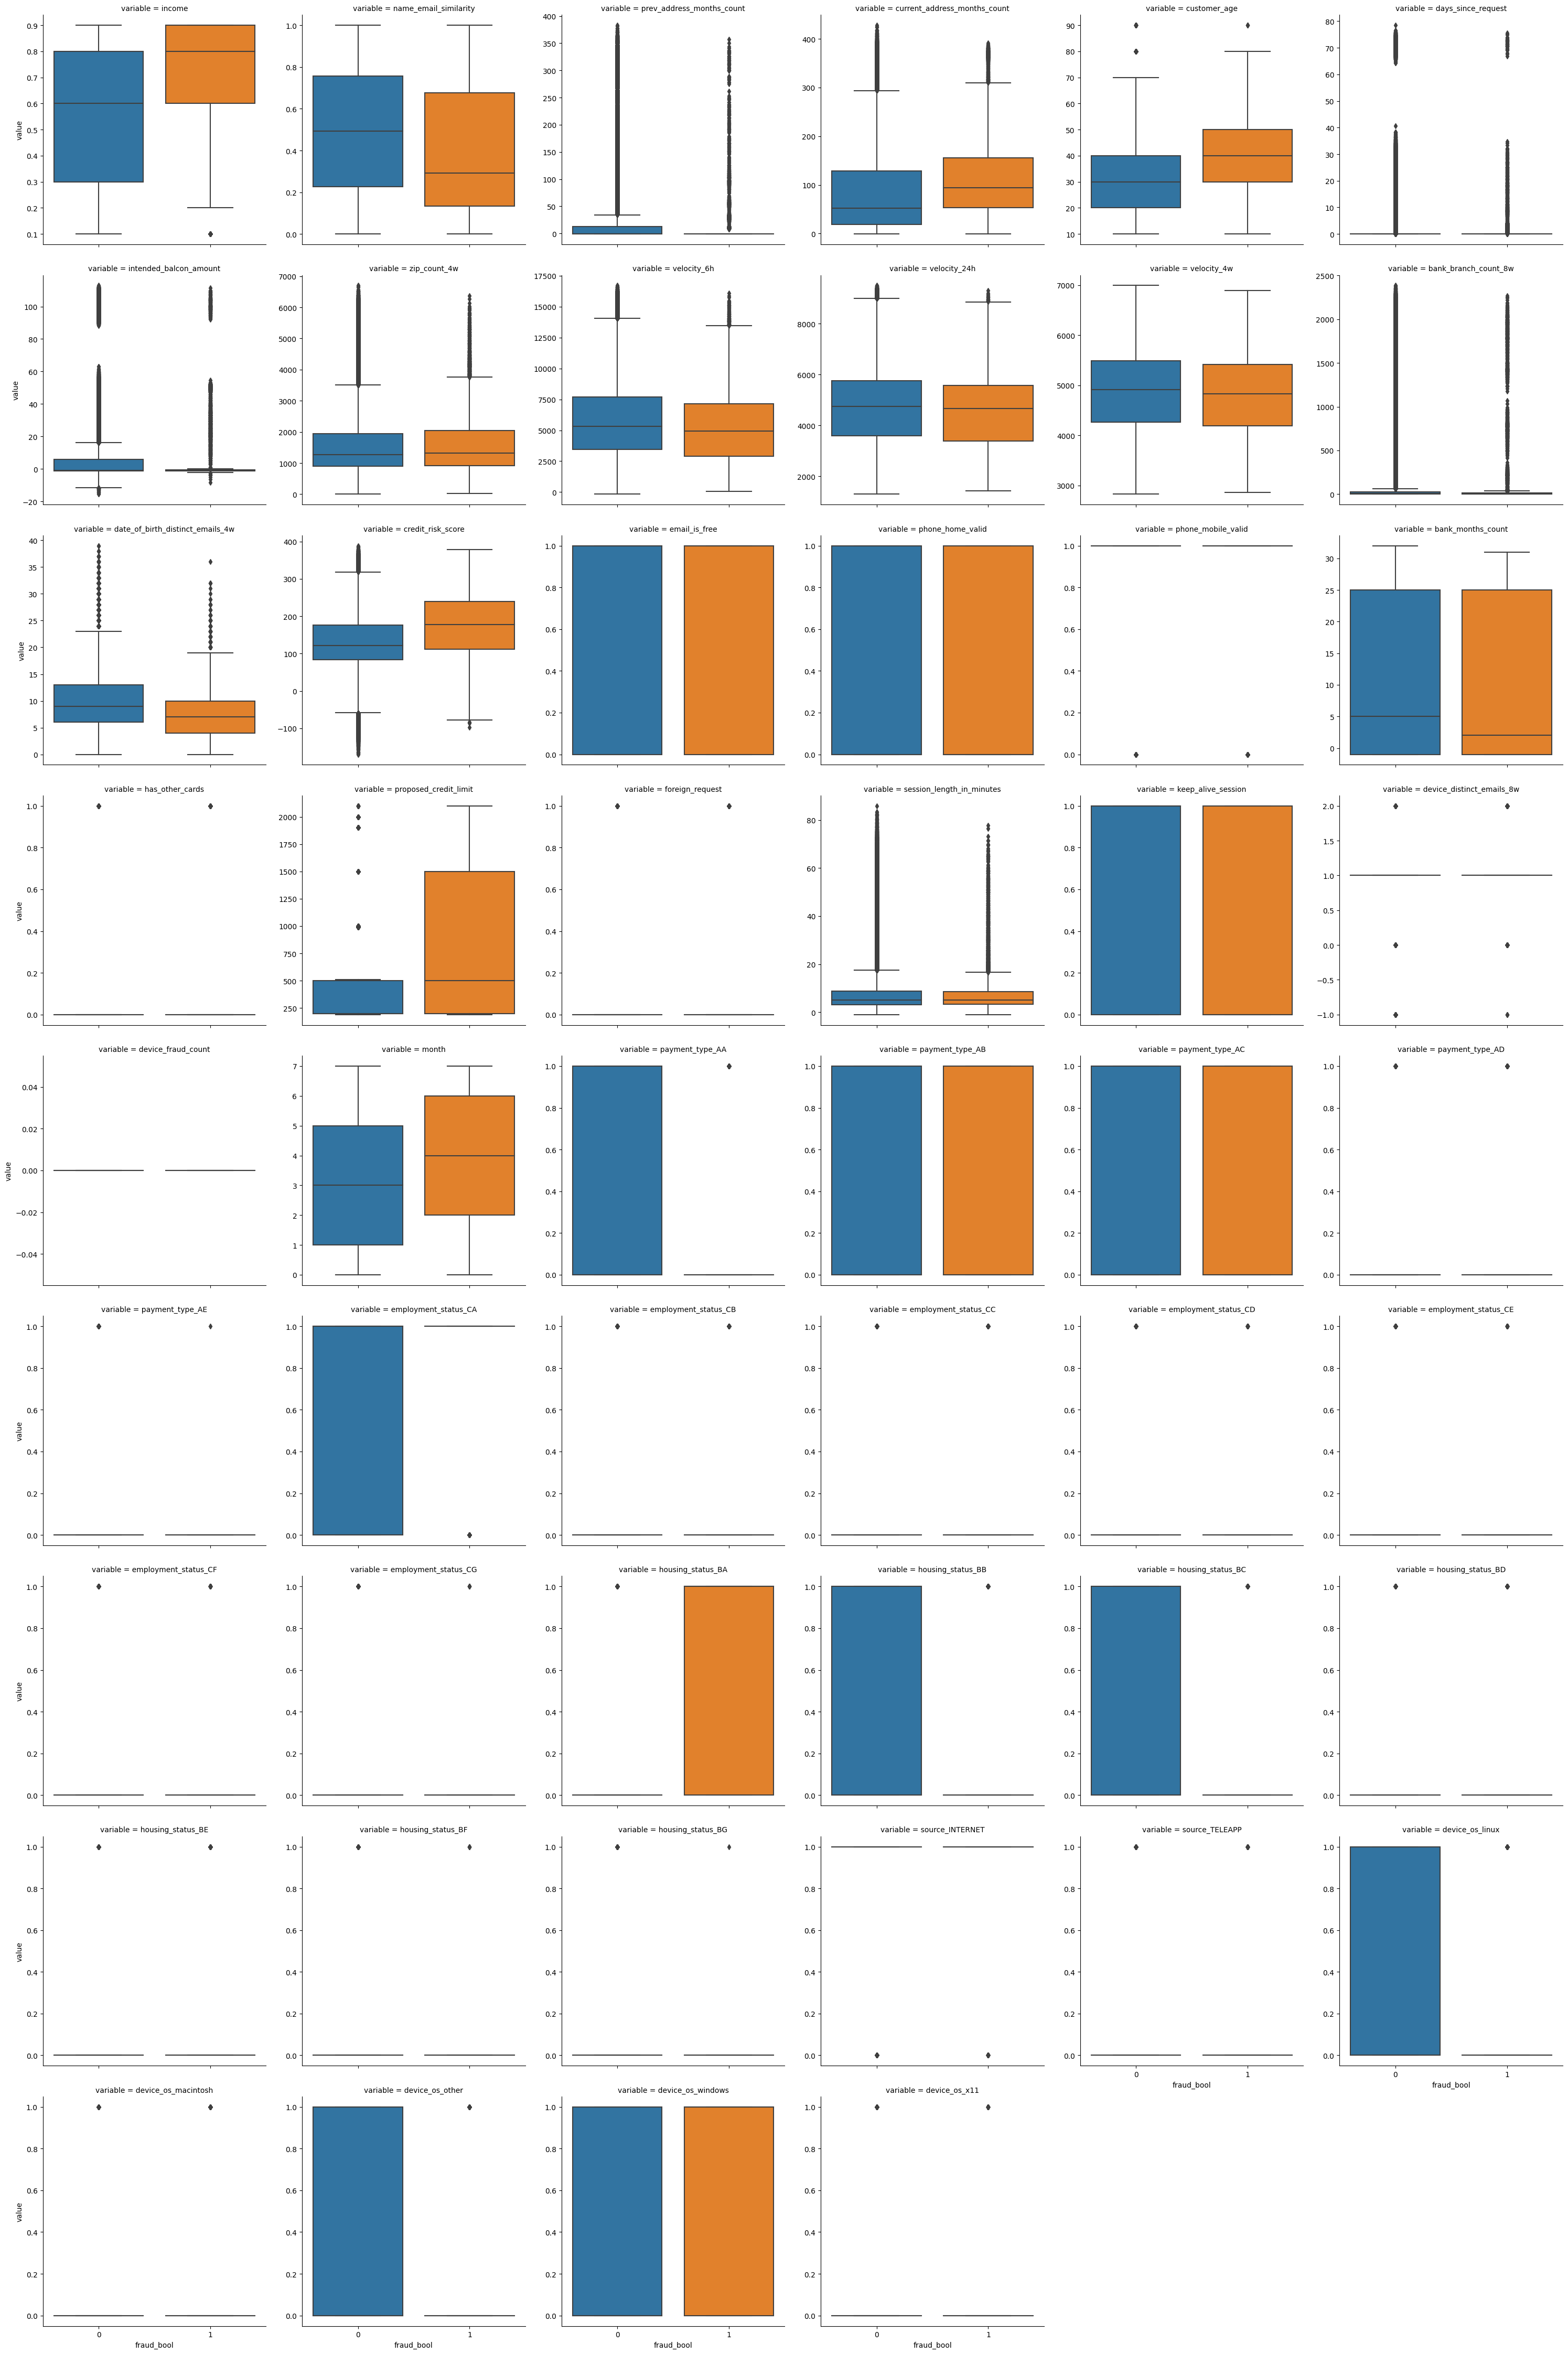

In [7]:
melt_df = df_encoded.melt(id_vars='fraud_bool')
# plot
p = sns.catplot(kind='box', data=melt_df, x='fraud_bool', y='value', col='variable', col_wrap=6,sharey=False)

<AxesSubplot:>

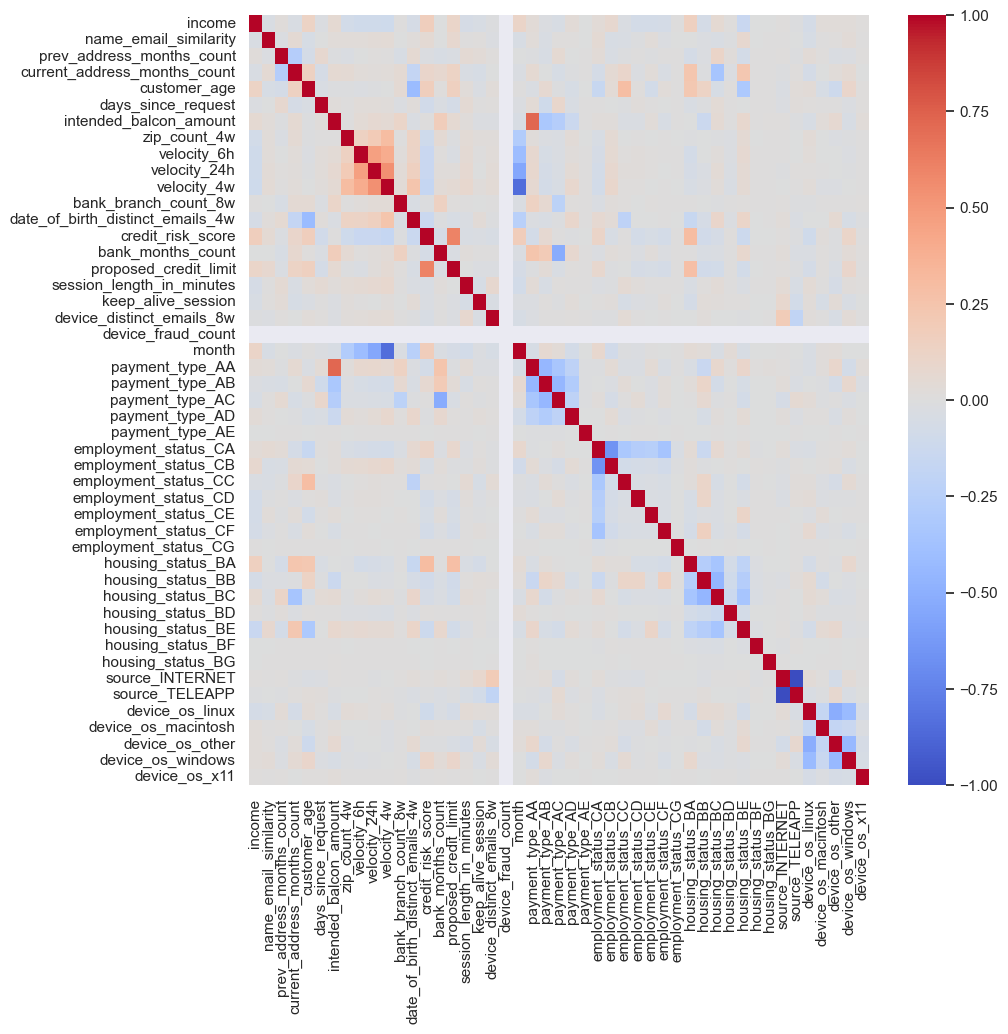

In [8]:
corr_mat = df_encoded.corr()
sns.set (rc = {'figure.figsize':(10, 10)})
sns.heatmap(corr_mat, cmap='coolwarm', fmt=".1f",xticklabels=True, yticklabels=True)

Similar to the proposed hypothesis, there seems to be some observed correlation between variables:
1. the velocity (6h, 24h and 4w) (and zip_count_4w, date_of_birth_distinct_emails_4w)
2. the proposed_credit_limit and credit_risk_score.
3. intended beacon_amount and payment_type_AA.

In [10]:
MIC = mutual_info_classif(df_encoded.iloc[:,:-1],df_encoded.iloc[:,-1:],)
print(MIC)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1.78693202e-02 9.68998178e-04 8.60748718e-03 2.65323323e-03
 4.94185357e-02 3.72636661e-04 7.67439561e-04 1.11261577e-04
 2.23687037e-04 4.61406691e-04 2.69276932e-04 1.13542068e-03
 1.29945206e-02 3.33511474e-03 6.78820477e-02 4.33920532e-02
 1.73533580e-01 1.13161666e-02 1.30509244e-02 5.13125748e-02
 9.97526384e-05 7.94276710e-05 8.11141136e-02 1.98692024e-01
 5.96074521e-05 2.70262576e-02 1.70946614e-02 3.33260948e-02
 1.55810041e-02 3.20642334e-03 0.00000000e+00 1.22391549e-01
 4.65537525e-03 6.61364196e-04 1.94418365e-04 1.98302227e-04
 6.43018878e-04 0.00000000e+00 1.10711053e-02 1.71455220e-02
 3.47360778e-02 8.88290562e-05 7.91125453e-03 1.50571971e-04
 1.59936370e-05 2.08945827e-01 9.87189750e-06 2.81692657e-02
 5.93725438e-04 2.97375739e-02 1.90990941e-02 1.05220554e-04]


source_INTERNET                     0.208946
device_distinct_emails_8w           0.198692
phone_mobile_valid                  0.173534
employment_status_CA                0.122392
keep_alive_session                  0.081114
email_is_free                       0.067882
proposed_credit_limit               0.051313
customer_age                        0.049419
phone_home_valid                    0.043392
housing_status_BC                   0.034736
payment_type_AB                     0.033326
device_os_other                     0.029738
device_os_linux                     0.028169
month                               0.027026
device_os_windows                   0.019099
income                              0.017869
housing_status_BB                   0.017146
payment_type_AA                     0.017095
payment_type_AC                     0.015581
has_other_cards                     0.013051
date_of_birth_distinct_emails_4w    0.012995
bank_months_count                   0.011316
housing_st

<AxesSubplot:>

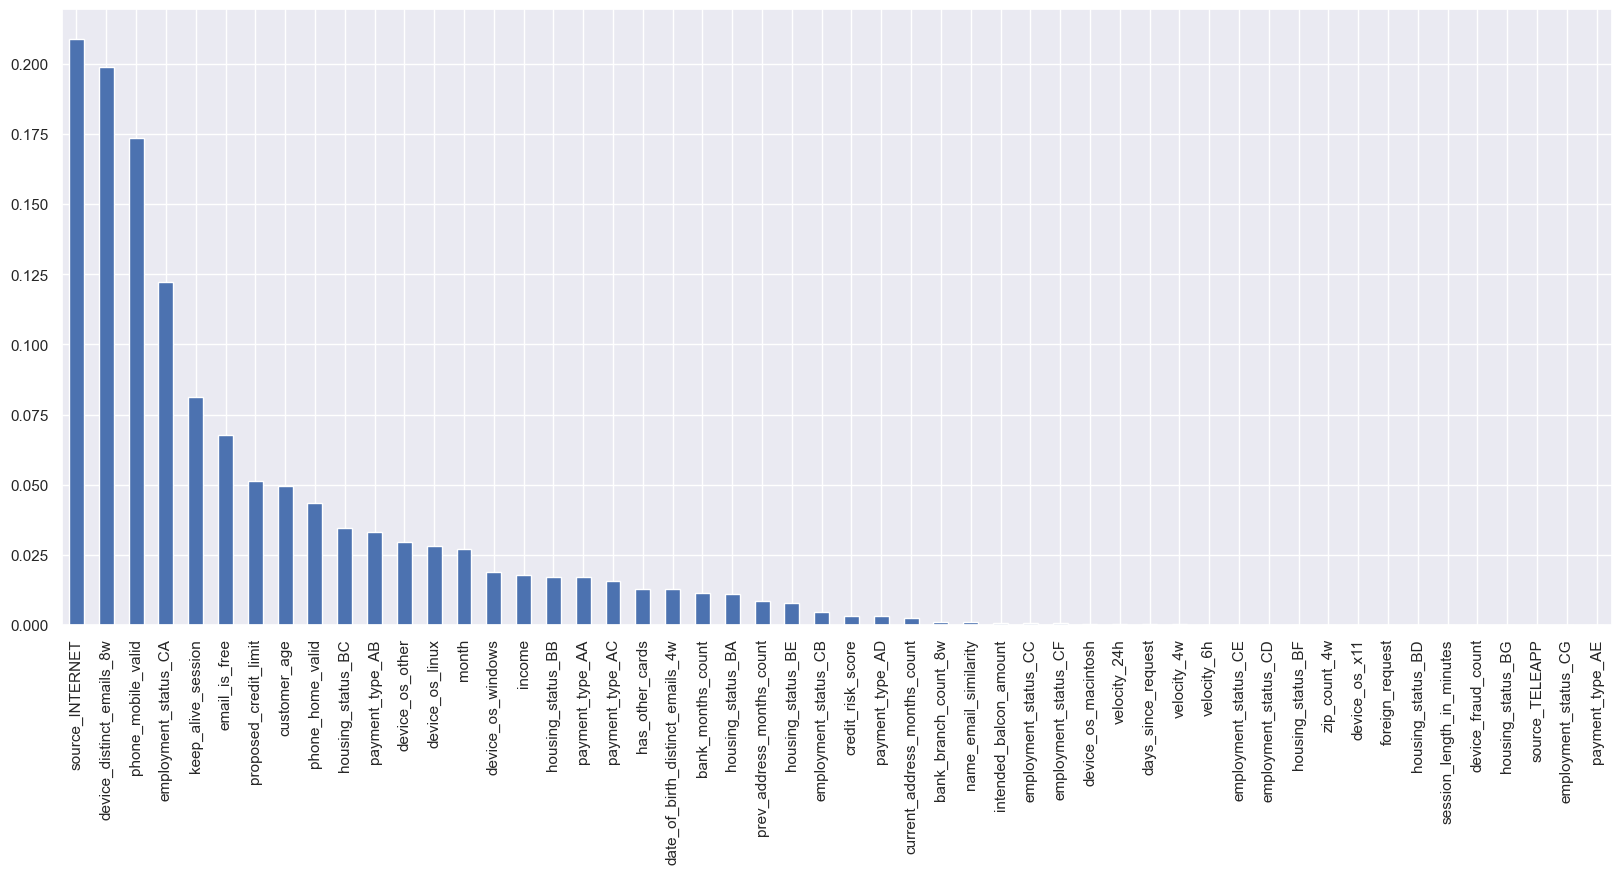

In [12]:
MIC = pd.Series(MIC)
MIC.index = df_encoded.iloc[:,:-1].columns
print(MIC.sort_values(ascending=False))
MIC.sort_values(ascending=False).plot.bar(figsize=(20, 8))

From mutual information, we are able to determine the dependence of one variable with another. In this plot, `source_INTERNET`, `device_distinct_emails_8w`, `phone_mobile_valid` provides the most information as to whether a bank account is fraudulent. 

In [16]:
df_encoded.columns

Index(['income', 'name_email_similarity', 'prev_address_months_count',
       'current_address_months_count', 'customer_age', 'days_since_request',
       'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'credit_risk_score',
       'email_is_free', 'phone_home_valid', 'phone_mobile_valid',
       'bank_months_count', 'has_other_cards', 'proposed_credit_limit',
       'foreign_request', 'session_length_in_minutes', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month',
       'payment_type_AA', 'payment_type_AB', 'payment_type_AC',
       'payment_type_AD', 'payment_type_AE', 'employment_status_CA',
       'employment_status_CB', 'employment_status_CC', 'employment_status_CD',
       'employment_status_CE', 'employment_status_CF', 'employment_status_CG',
       'housing_status_BA', 'housing_status_BB', 'housing_status_BC',
       'housing_sta

credit_risk_score                   0.017008
customer_age                        0.013701
housing_status_BA                   0.013444
proposed_credit_limit               0.011063
velocity_4w                         0.010903
month                               0.010575
housing_status_BE                   0.010344
intended_balcon_amount              0.008756
velocity_6h                         0.006259
velocity_24h                        0.006053
session_length_in_minutes           0.005094
date_of_birth_distinct_emails_4w    0.004782
current_address_months_count        0.004560
name_email_similarity               0.004014
has_other_cards                     0.003244
zip_count_4w                        0.003219
employment_status_CB                0.003159
device_os_linux                     0.002981
bank_months_count                   0.002736
prev_address_months_count           0.002459
employment_status_CE                0.002453
housing_status_BB                   0.002348
days_since

<AxesSubplot:>

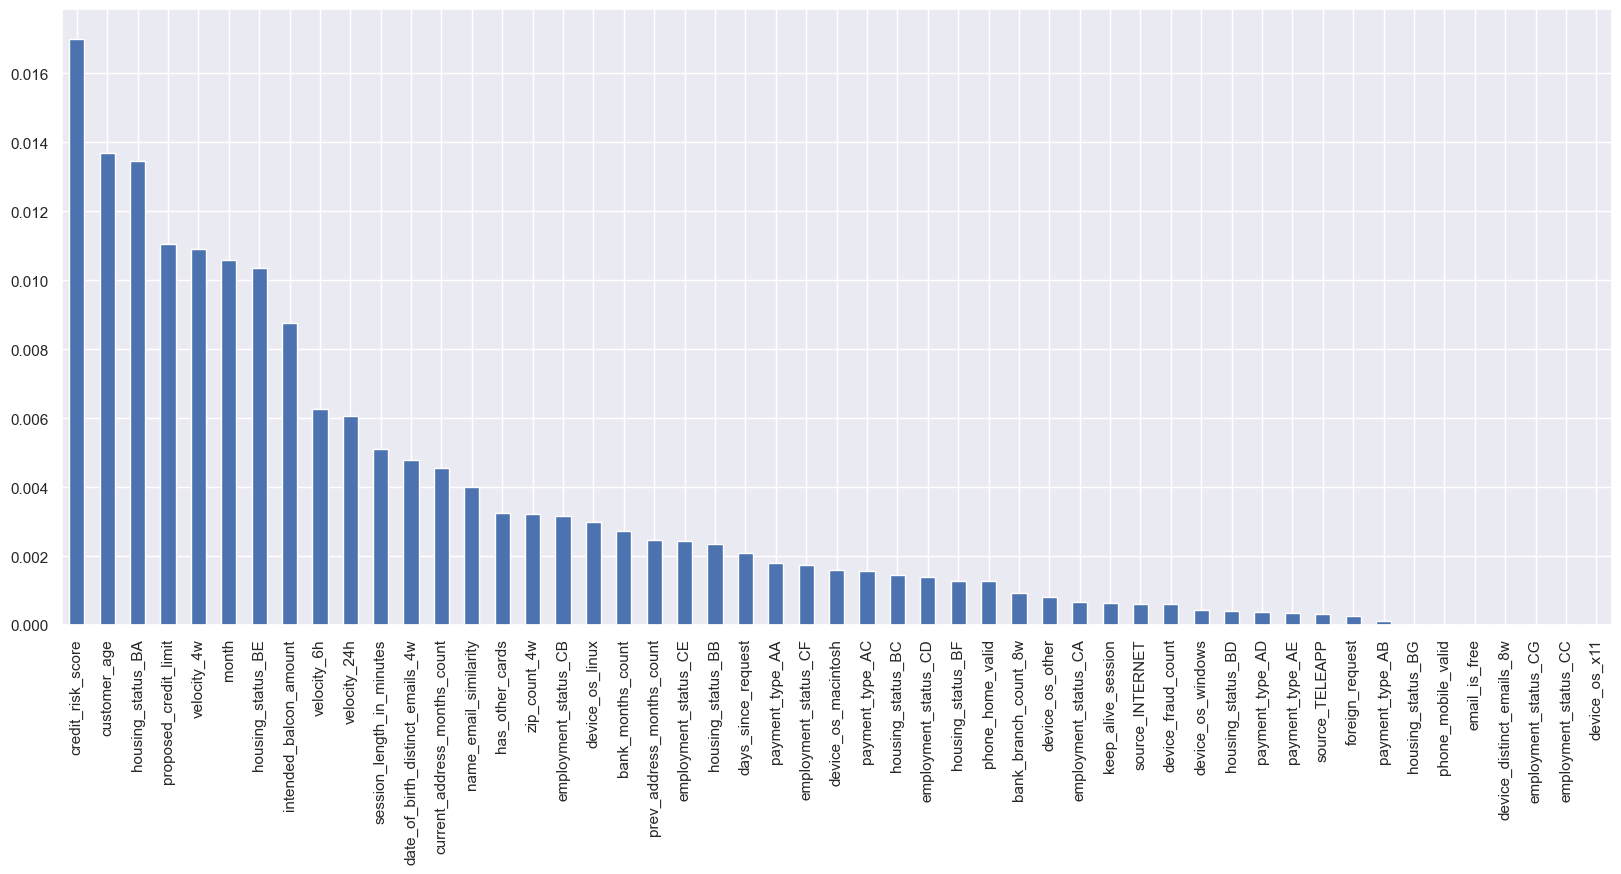

In [18]:
fin_mic = mutual_info_regression(df_encoded.iloc[:,1:-1],df_encoded.iloc[:,:1])
fin_mic = pd.Series(fin_mic)
fin_mic.index = df_encoded.iloc[:,1:-1].columns
print(fin_mic.sort_values(ascending=False))
fin_mic.sort_values(ascending=False).plot.bar(figsize=(20, 8))

## Feature Engineering

In [19]:
# first split train-test-validation:
print(df_encoded['month'].value_counts())
test = df_encoded.loc[df['month'].isin([6,7])]
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1:]

train = df_encoded.loc[~df_encoded['month'].isin([6,7])]
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1:]

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
rus = RandomUnderSampler(sampling_strategy=1)

X_train, y_train = rus.fit_resample(X_train, y_train)

print(X_test.shape, y_test.shape, X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)
print(y_train.value_counts())

3    150936
2    136979
0    132440
4    127691
1    127620
5    119323
6    108168
7     96843
Name: month, dtype: int64
(205011, 52) (205011, 1) (13950, 52) (13950, 1) (119249, 52) (119249, 1)
fraud_bool
0             6975
1             6975
dtype: int64


From the information given from the datasheet, the data can be separated by time by using the `month` column [0,7] which represents the 8 months at which the data is collected across. As data which are more recent will be closer to the actual data, hence `month` 6 and 7 will be taken out as the test data. For the remaining 6 months, it will be split randomly in a 85/15 split into train and validation for testing.

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

# Function to evaluate the model and print metrics
def evaluate_model(model, X_train, y_train, X_valid, y_valid):
    # Train the model
    y_train = y_train.values.ravel()
    y_valid = y_valid.values.ravel()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_valid)

    # Print accuracy
    print('Accuracy on validation set: {:.8f}'.format(accuracy_score(y_valid, y_pred)))

    # Print confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_valid, y_pred).ravel()
    print('True Neg:', tn, '\t' ,'False Pos:', fp)
    print('False Neg:', fn, '\t', 'True Pos:', tp)

    # Print precision and recall
    print('Precision on validation set: {:.8f}'.format(precision_score(y_valid, y_pred)))
    print('Recall on validation set: {:.8f}'.format(recall_score(y_valid, y_pred)))
    print('F1-Score on validation set: {:.8f}'.format(f1_score(y_valid, y_pred)))


    # Plot ROC Curve
    try:
        class_prob = model.predict_proba(X_valid)
        preds = class_prob[:, 1]
        fpr, tpr, threshold = roc_curve(y_valid, preds)
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, label='Model (area = %0.5f)' % roc_auc)
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()
    except AttributeError:
        print("Model does not have predict_proba method. ROC curve not plotted.")

### Velocity

#### PCA

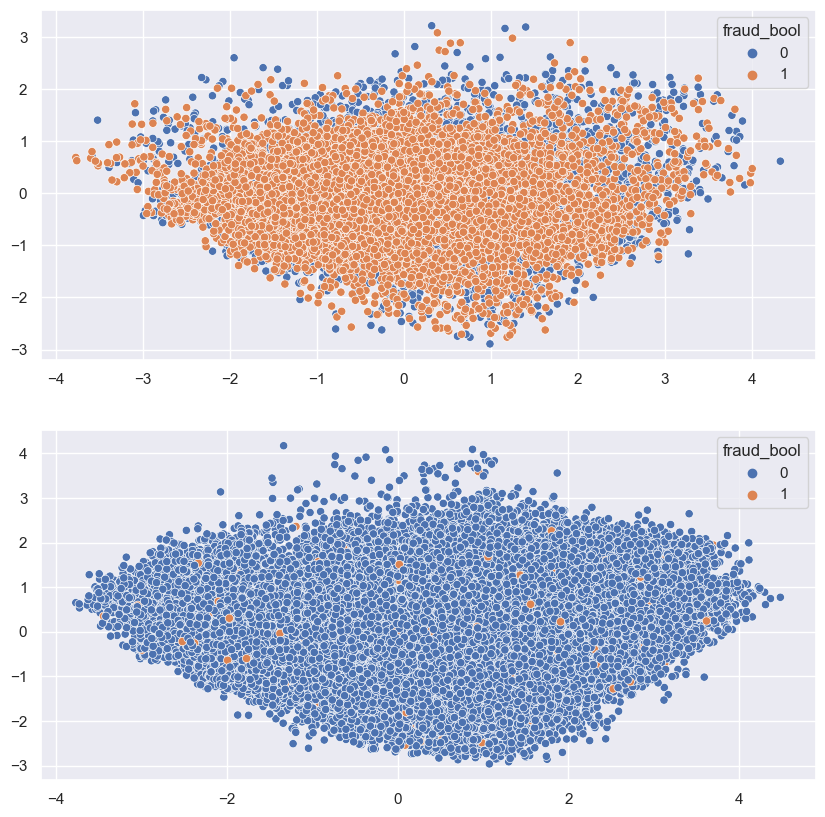

[0.56696612 0.23546373 0.19757014]


In [21]:
#'velocity_6h', 'velocity_24h', 'velocity_4w'
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X_train[['velocity_6h', 'velocity_24h', 'velocity_4w']])
Xt_valid = pipe.transform(X_valid[['velocity_6h', 'velocity_24h', 'velocity_4w']])

plt.subplot(2, 1, 1)
sns.scatterplot(x=Xt[:,0], y=Xt[:,1], hue=y_train['fraud_bool'])
plt.subplot(2, 1, 2)
sns.scatterplot(x=Xt_valid[:,0], y=Xt_valid[:,1], hue=y_valid['fraud_bool'])
plt.show()

print(pipe.named_steps['pca'].explained_variance_ratio_)

Accuracy on validation set: 0.51422653
True Neg: 60687 	 False Pos: 57386
False Neg: 542 	 True Pos: 634
Precision on validation set: 0.01092727
Recall on validation set: 0.53911565
F1-Score on validation set: 0.02142037


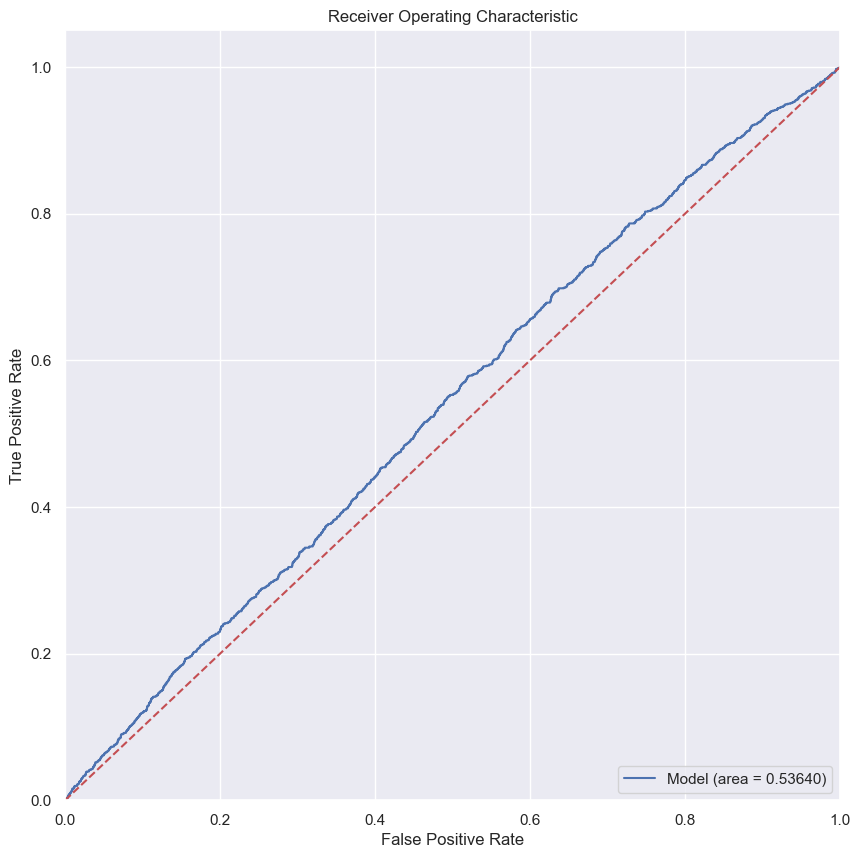

Accuracy on validation set: 0.50547174
True Neg: 59645 	 False Pos: 58428
False Neg: 544 	 True Pos: 632
Precision on validation set: 0.01070098
Recall on validation set: 0.53741497
F1-Score on validation set: 0.02098413


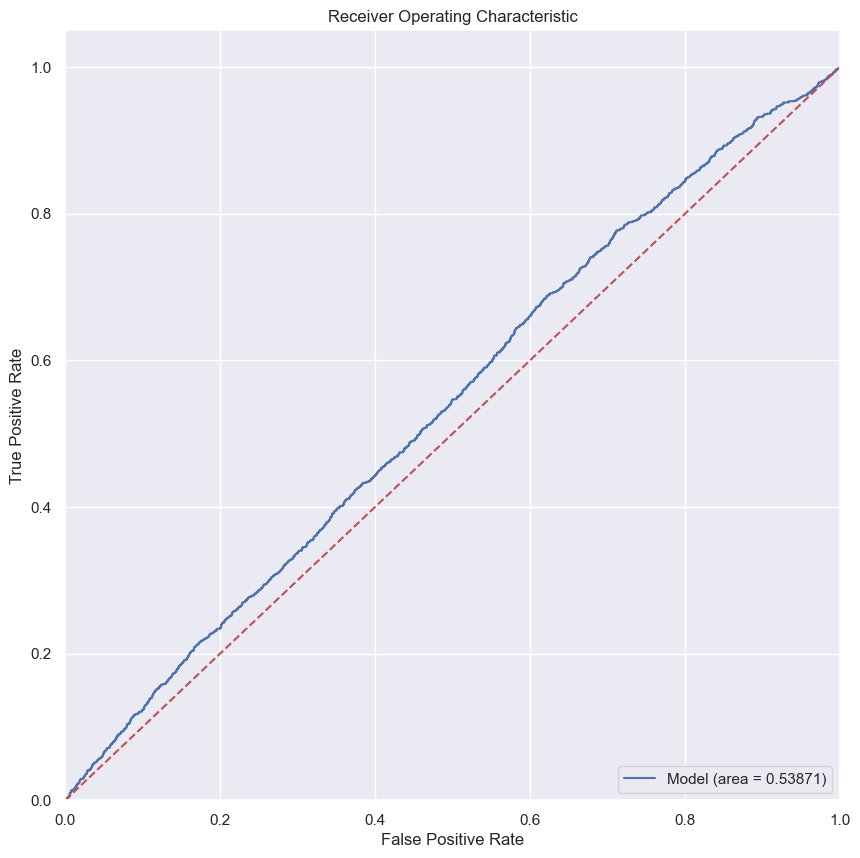

In [22]:
# 'velocity_6h', 'velocity_24h', 'velocity_4w'
# base model
logs = LogisticRegression()
evaluate_model(logs, X_train[['velocity_6h', 'velocity_24h', 'velocity_4w']], y_train, X_valid[['velocity_6h', 'velocity_24h', 'velocity_4w']], y_valid)
evaluate_model(logs, Xt, y_train, Xt_valid, y_valid)

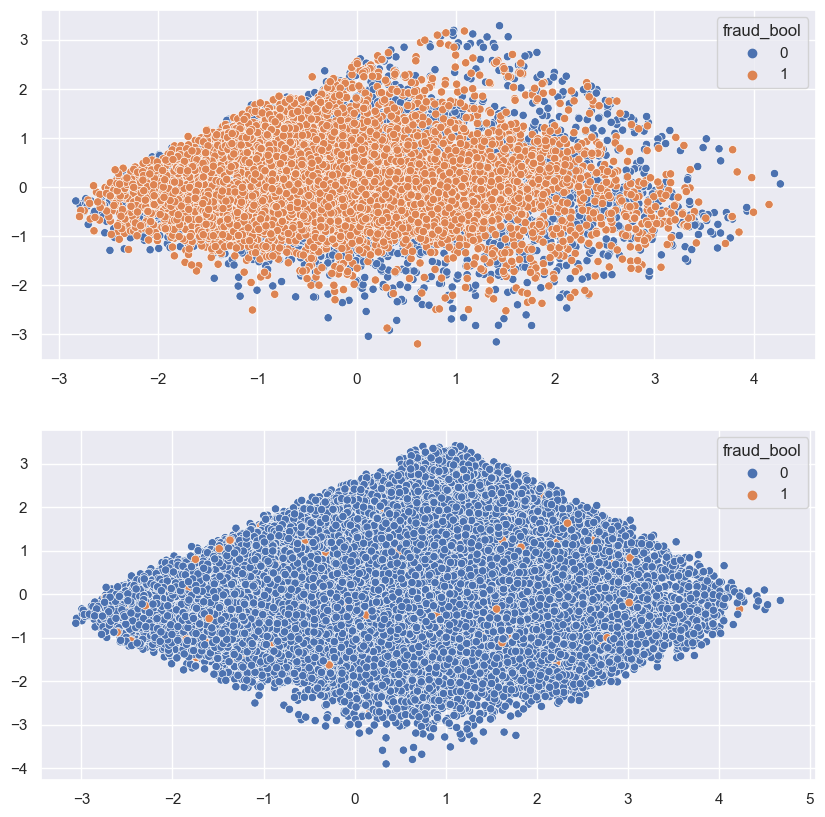

[0.68294371 0.31705629]


In [28]:
# 'velocity_6h', 'velocity_24h'
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X_train[['velocity_6h', 'velocity_24h']])
Xt_valid = pipe.transform(X_valid[['velocity_6h', 'velocity_24h']])

plt.subplot(2, 1, 1)
sns.scatterplot(x=Xt[:,0], y=Xt[:,1], hue=y_train['fraud_bool'])
plt.subplot(2, 1, 2)
sns.scatterplot(x=Xt_valid[:,0], y=Xt_valid[:,1], hue=y_valid['fraud_bool'])
plt.show()

print(pipe.named_steps['pca'].explained_variance_ratio_)

Explainable variance has increased with the removal of `velocity_4w` and only including `velocity_6h` and `velocity_24h`. This may be due to the fact that the 4 week timespan is too long that the trend and pattern of the velocity becomes less distinct.

Accuracy on validation set: 0.61953559
True Neg: 73391 	 False Pos: 44682
False Neg: 688 	 True Pos: 488
Precision on validation set: 0.01080363
Recall on validation set: 0.41496599
F1-Score on validation set: 0.02105899


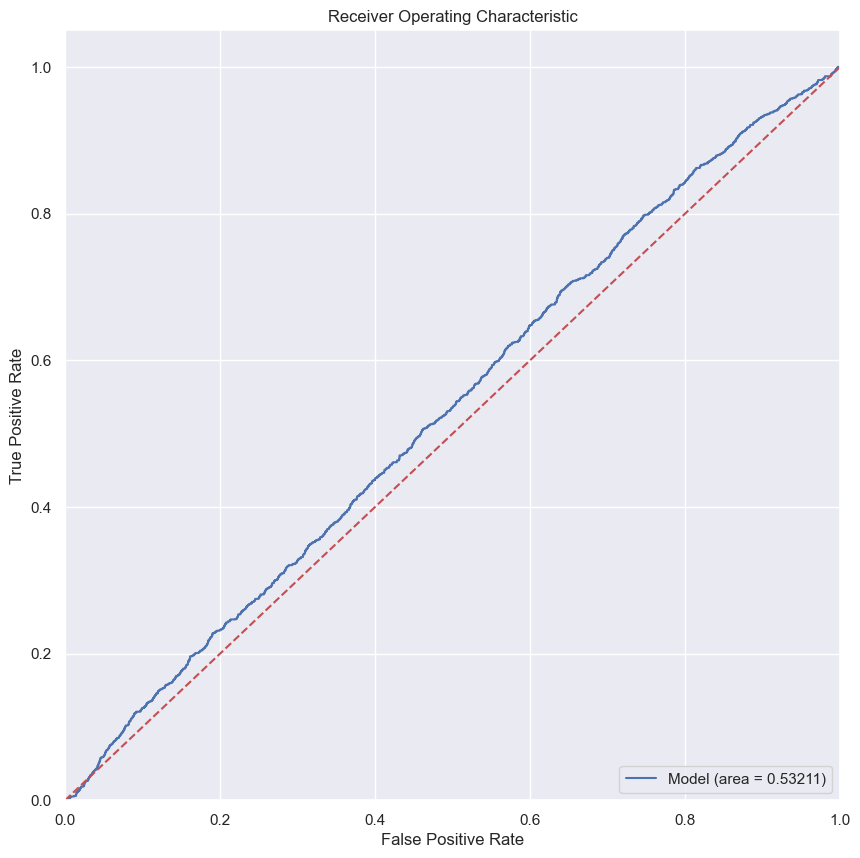

Accuracy on validation set: 0.49966037
True Neg: 58933 	 False Pos: 59140
False Neg: 525 	 True Pos: 651
Precision on validation set: 0.01088793
Recall on validation set: 0.55357143
F1-Score on validation set: 0.02135582


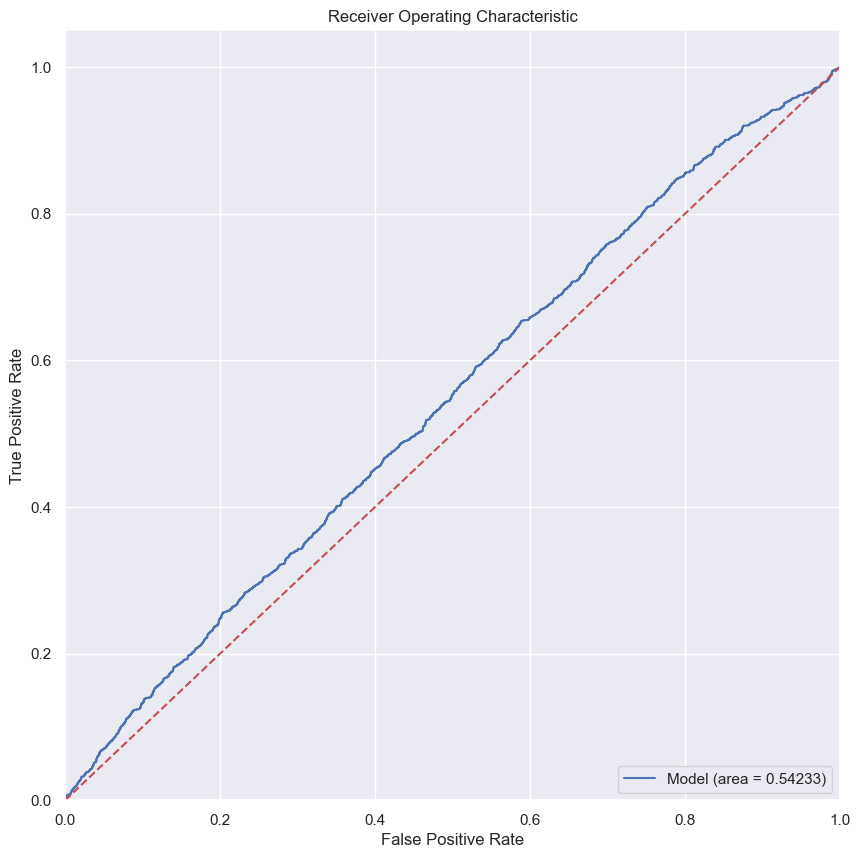

In [29]:
# 'velocity_6h', 'velocity_24h'
# base model
logs = LogisticRegression()
evaluate_model(logs, X_train[['velocity_6h', 'velocity_24h']], y_train, X_valid[['velocity_6h', 'velocity_24h']], y_valid)
evaluate_model(logs, Xt, y_train, Xt_valid, y_valid)

The recall of the model increases when we use the PCA components instead, with more true positive and less false negative observed. Hence, using the PCA components will provide a stricter criteria that predicts more fraudlent bank accounts.

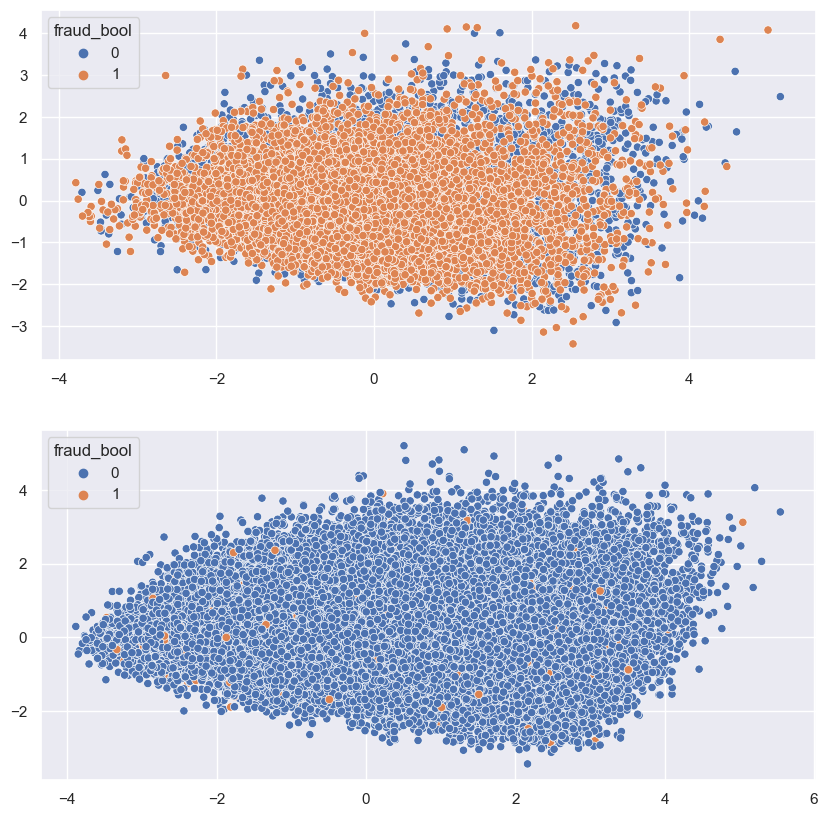

[0.35912511 0.20487934 0.18640388 0.13375208 0.11583958]


In [30]:
# 'velocity_6h', 'velocity_24h', 'velocity_4w', 'zip_count_4w', 'date_of_birth_distinct_emails_4w'
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X_train[['velocity_6h', 'velocity_24h', 'velocity_4w', 'zip_count_4w', 'date_of_birth_distinct_emails_4w']])
Xt_valid = pipe.transform(X_valid[['velocity_6h', 'velocity_24h', 'velocity_4w', 'zip_count_4w', 'date_of_birth_distinct_emails_4w']])

plt.subplot(2, 1, 1)
sns.scatterplot(x=Xt[:,0], y=Xt[:,1], hue=y_train['fraud_bool'])
plt.subplot(2, 1, 2)
sns.scatterplot(x=Xt_valid[:,0], y=Xt_valid[:,1], hue=y_valid['fraud_bool'])
plt.show()

print(pipe.named_steps['pca'].explained_variance_ratio_)

Accuracy on validation set: 0.57449538
True Neg: 67776 	 False Pos: 50297
False Neg: 444 	 True Pos: 732
Precision on validation set: 0.01434478
Recall on validation set: 0.62244898
F1-Score on validation set: 0.02804329


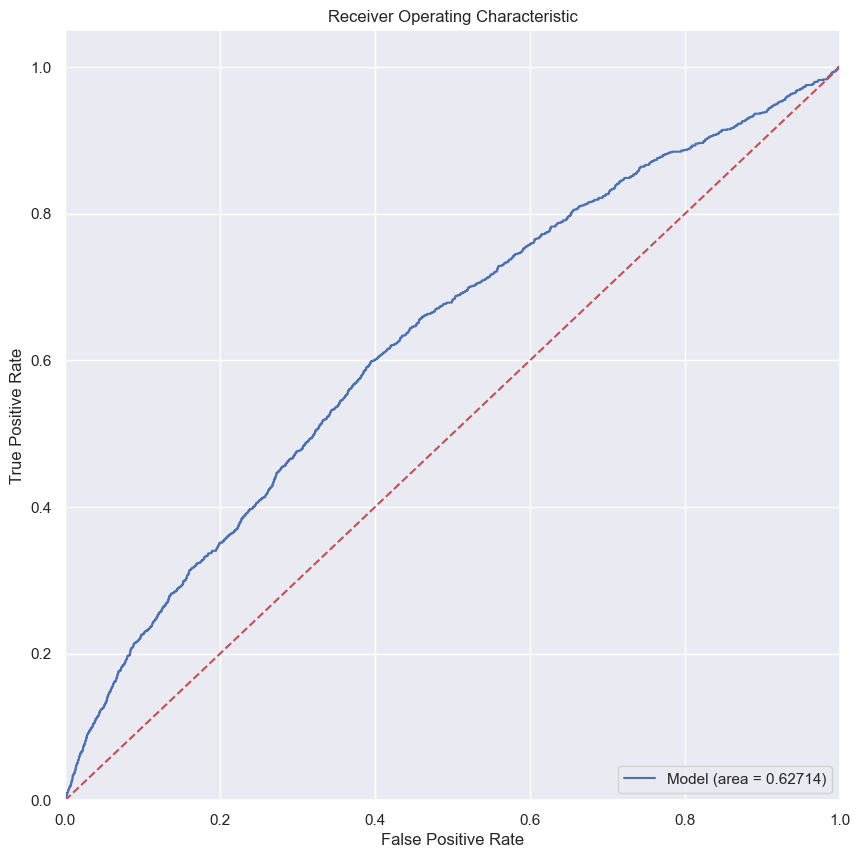

Accuracy on validation set: 0.56002147
True Neg: 66029 	 False Pos: 52044
False Neg: 423 	 True Pos: 753
Precision on validation set: 0.01426217
Recall on validation set: 0.64030612
F1-Score on validation set: 0.02790284


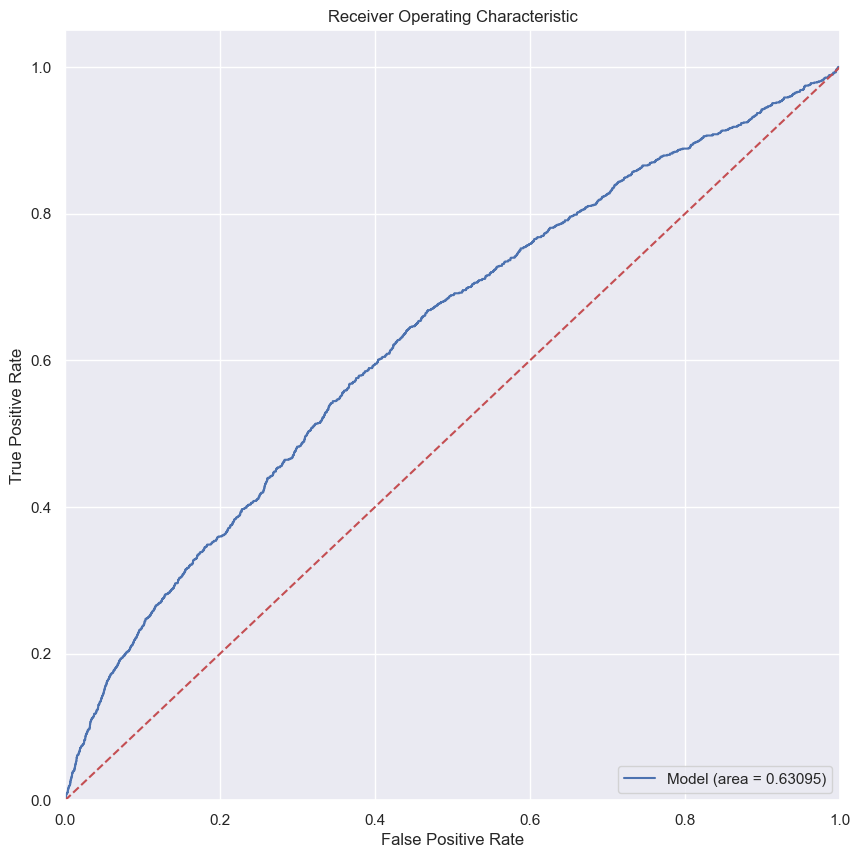

In [31]:
# 'velocity_6h', 'velocity_24h', 'velocity_4w', 'zip_count_4w', 'date_of_birth_distinct_emails_4w'
# base model
logs = LogisticRegression()
evaluate_model(logs, X_train[['velocity_6h', 'velocity_24h', 'velocity_4w', 'zip_count_4w', 'date_of_birth_distinct_emails_4w']], y_train, X_valid[['velocity_6h', 'velocity_24h', 'velocity_4w', 'zip_count_4w', 'date_of_birth_distinct_emails_4w']], y_valid)
evaluate_model(logs, Xt, y_train, Xt_valid, y_valid)

Similarly, the recall of the model increases when we use the PCA components instead, with more true positive and less false negative observed. Hence, using the PCA components will provide a stricter criteria that predicts more fraudlent bank accounts. However, the explainable variance of the PCA components suggest that these variables may not be a suitable combination.

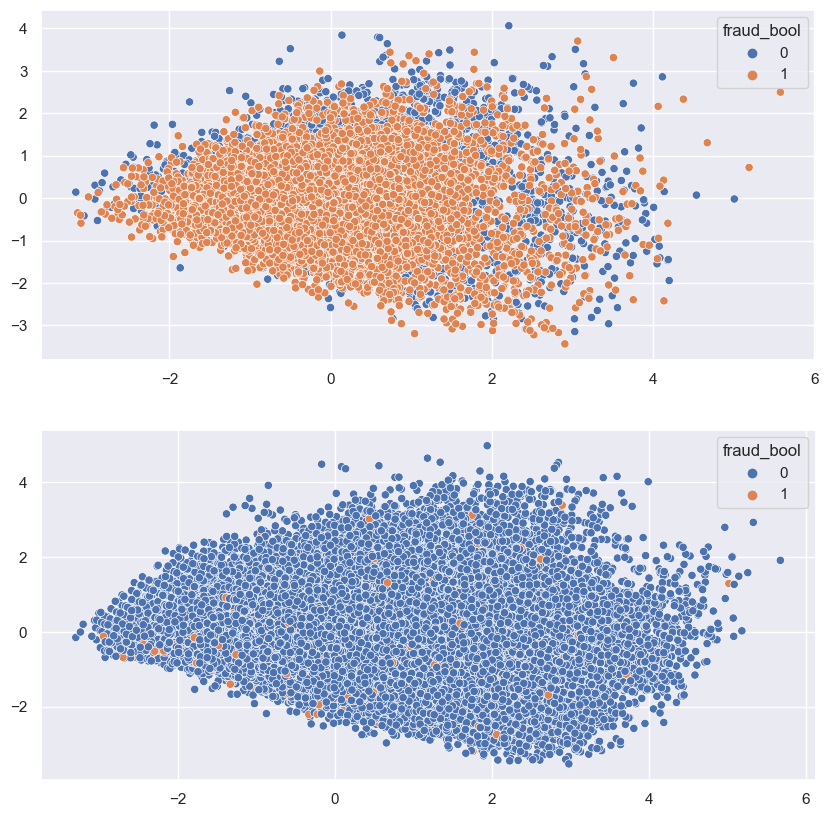

[0.43101915 0.31114388 0.25783697]


In [36]:
#'velocity_4w', 'zip_count_4w', 'date_of_birth_distinct_emails_4w'
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X_train[[ 'velocity_4w', 'zip_count_4w', 'date_of_birth_distinct_emails_4w']])
Xt_valid = pipe.transform(X_valid[['velocity_4w', 'zip_count_4w', 'date_of_birth_distinct_emails_4w']])

plt.subplot(2, 1, 1)
sns.scatterplot(x=Xt[:,0], y=Xt[:,1], hue=y_train['fraud_bool'])
plt.subplot(2, 1, 2)
sns.scatterplot(x=Xt_valid[:,0], y=Xt_valid[:,1], hue=y_valid['fraud_bool'])
plt.show()

print(pipe.named_steps['pca'].explained_variance_ratio_)

Accuracy on validation set: 0.56579091
True Neg: 66742 	 False Pos: 51331
False Neg: 448 	 True Pos: 728
Precision on validation set: 0.01398413
Recall on validation set: 0.61904762
F1-Score on validation set: 0.02735043


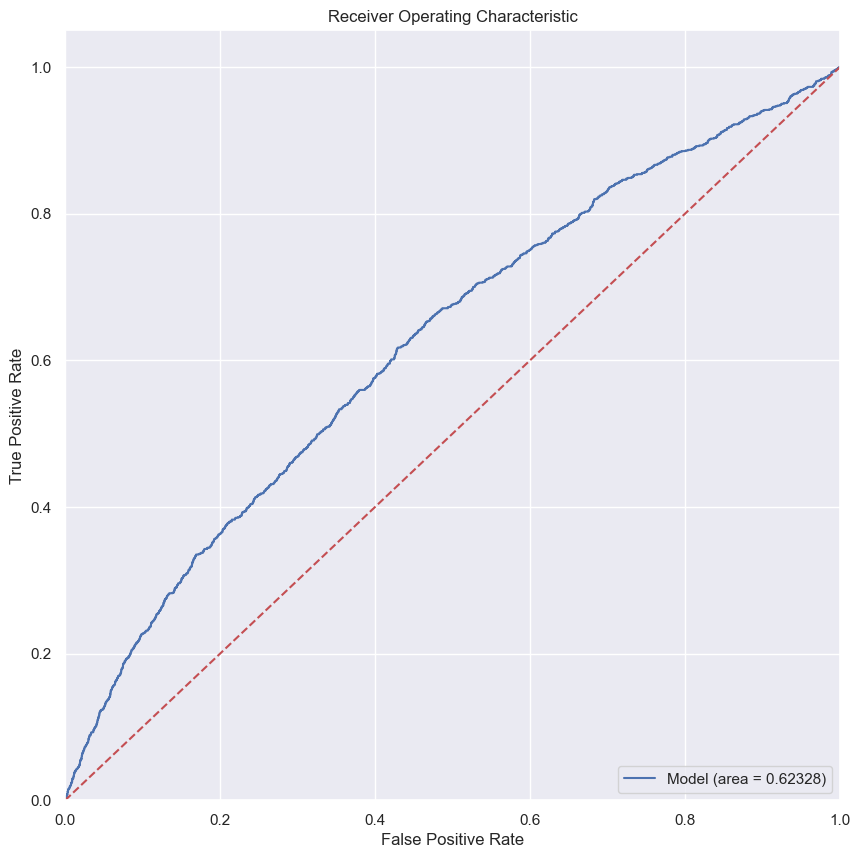

Accuracy on validation set: 0.54985786
True Neg: 64821 	 False Pos: 53252
False Neg: 427 	 True Pos: 749
Precision on validation set: 0.01387011
Recall on validation set: 0.63690476
F1-Score on validation set: 0.02714899


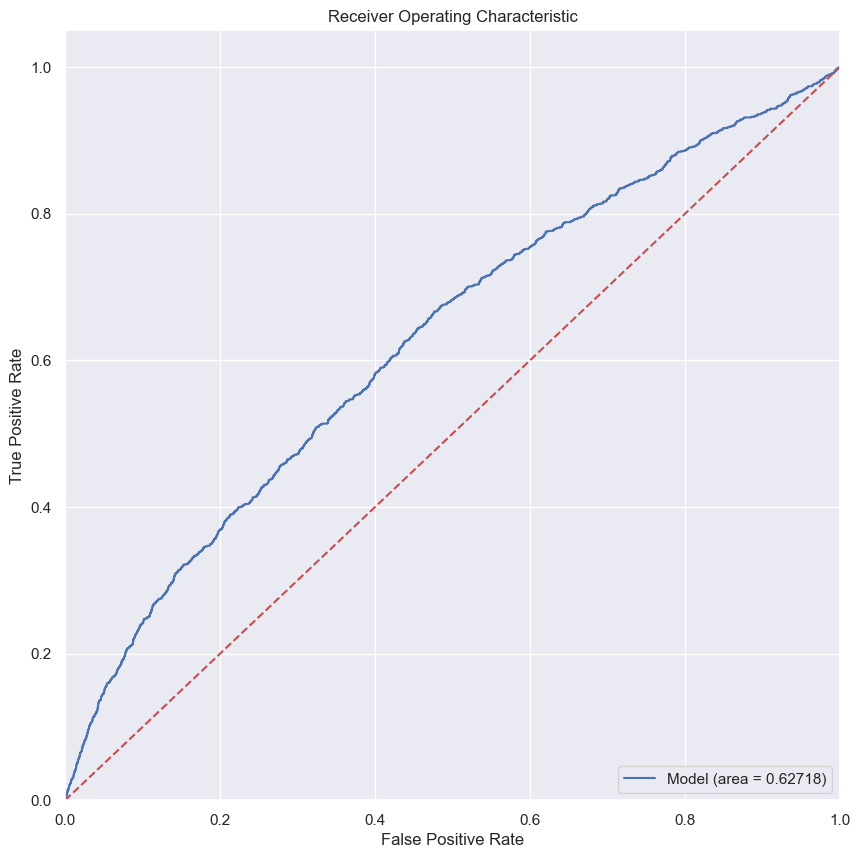

In [37]:
#'velocity_4w', 'zip_count_4w', 'date_of_birth_distinct_emails_4w'
# base model
logs = LogisticRegression()
evaluate_model(logs, X_train[['velocity_4w', 'zip_count_4w', 'date_of_birth_distinct_emails_4w']], y_train, X_valid[['velocity_4w', 'zip_count_4w', 'date_of_birth_distinct_emails_4w']], y_valid)
evaluate_model(logs, Xt, y_train, Xt_valid, y_valid)

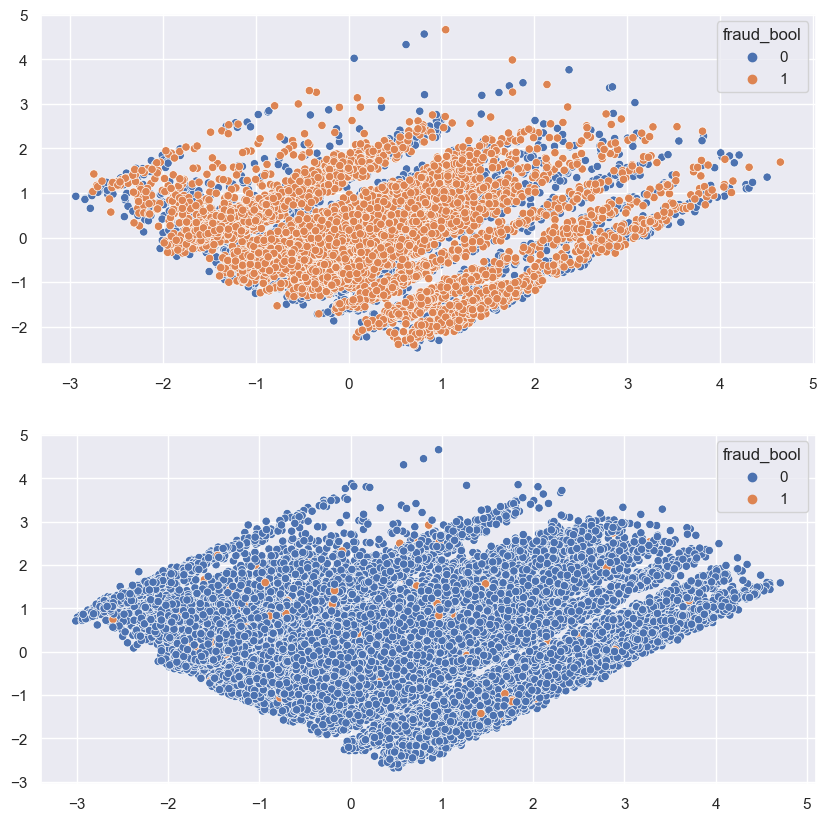

[0.60670365 0.39329635]


In [57]:
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X_train[[ 'velocity_4w', 'zip_count_4w']])
Xt_valid = pipe.transform(X_valid[['velocity_4w', 'zip_count_4w']])

plt.subplot(2, 1, 1)
sns.scatterplot(x=Xt[:,0], y=Xt[:,1], hue=y_train['fraud_bool'])
plt.subplot(2, 1, 2)
sns.scatterplot(x=Xt_valid[:,0], y=Xt_valid[:,1], hue=y_valid['fraud_bool'])
plt.show()

print(pipe.named_steps['pca'].explained_variance_ratio_)

Accuracy on validation set: 0.64845827
True Neg: 76876 	 False Pos: 41197
False Neg: 724 	 True Pos: 452
Precision on validation set: 0.01085260
Recall on validation set: 0.38435374
F1-Score on validation set: 0.02110917


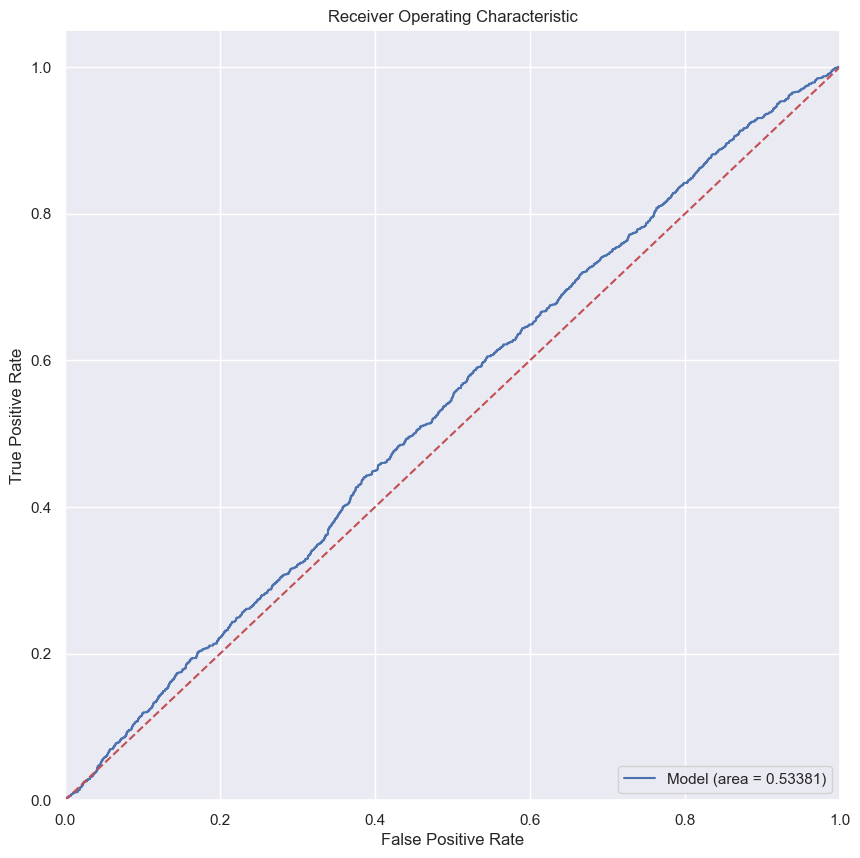

Accuracy on validation set: 0.63421915
True Neg: 75147 	 False Pos: 42926
False Neg: 693 	 True Pos: 483
Precision on validation set: 0.01112672
Recall on validation set: 0.41071429
F1-Score on validation set: 0.02166648


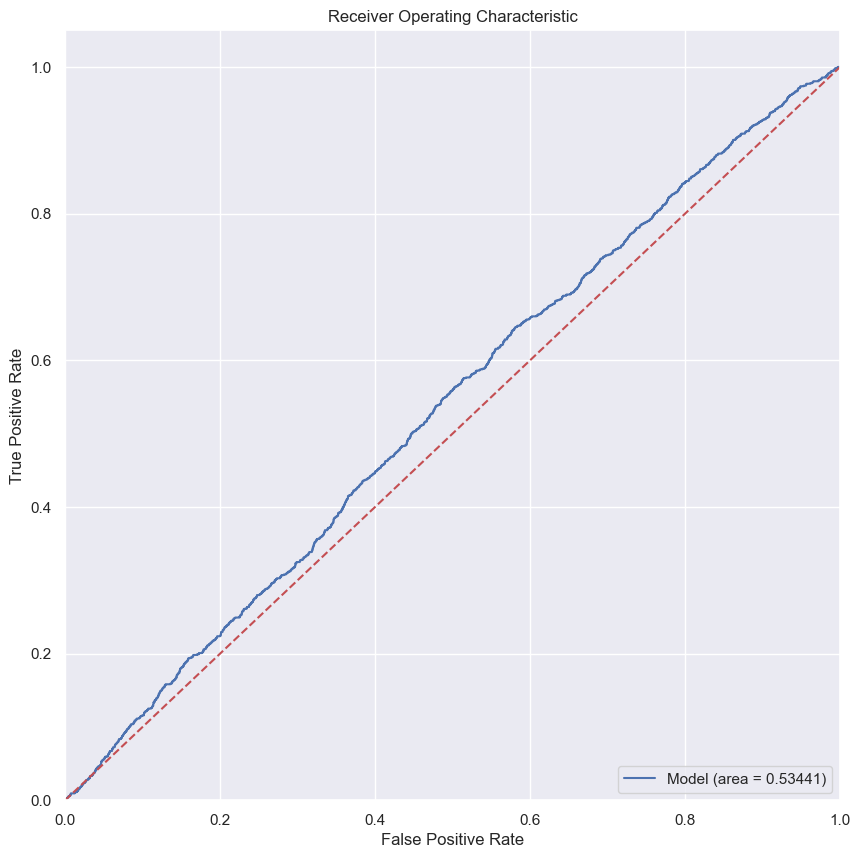

Accuracy on validation set: 0.56579091
True Neg: 66742 	 False Pos: 51331
False Neg: 448 	 True Pos: 728
Precision on validation set: 0.01398413
Recall on validation set: 0.61904762
F1-Score on validation set: 0.02735043


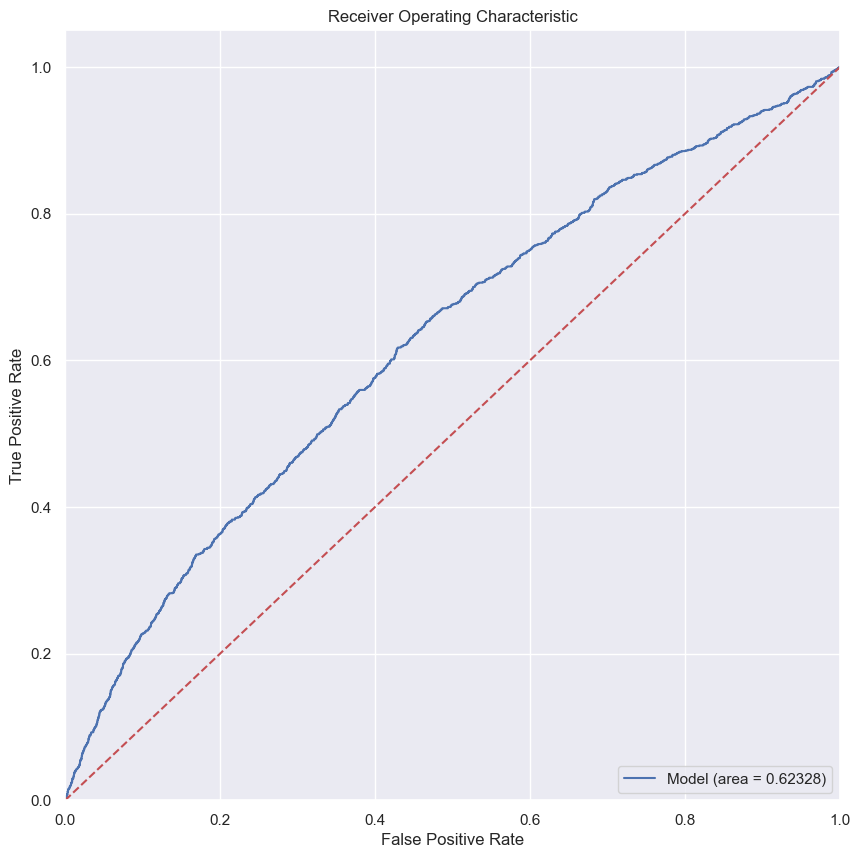

Accuracy on validation set: 0.54989140
True Neg: 64825 	 False Pos: 53248
False Neg: 427 	 True Pos: 749
Precision on validation set: 0.01387114
Recall on validation set: 0.63690476
F1-Score on validation set: 0.02715096


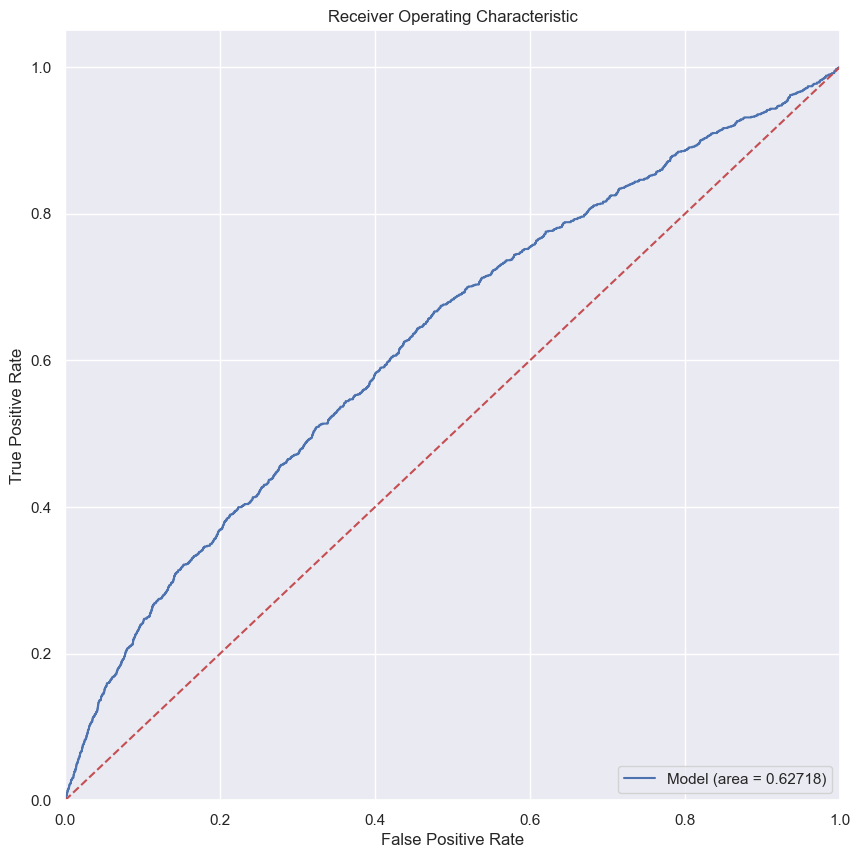

In [58]:
# base model
logs = LogisticRegression()
evaluate_model(logs, X_train[['velocity_4w', 'zip_count_4w']], y_train, X_valid[['velocity_4w', 'zip_count_4w']], y_valid)
evaluate_model(logs, Xt, y_train, Xt_valid, y_valid)

evaluate_model(logs, X_train[['velocity_4w', 'zip_count_4w', 'date_of_birth_distinct_emails_4w']], y_train, X_valid[['velocity_4w', 'zip_count_4w', 'date_of_birth_distinct_emails_4w']], y_valid)
evaluate_model(logs, np.hstack([Xt, np.array(X_train[['date_of_birth_distinct_emails_4w']])]), y_train, np.hstack([Xt_valid, np.array(X_valid[['date_of_birth_distinct_emails_4w']])]), y_valid)

From the 2 testings above, it suggest that `date_of_birth_distinct_emails_4w` may have a different spread compared to `velocity_4w` and `zip_count_4w` as the addition of it in our PCA decreases the explainable variance to quite a large extent. Nonetheless, `date_of_birth_distinct_emails_4w` appears to be a significant variable to determine if 

In [41]:
pca1 = PCA()
pipe1 = Pipeline([('scaler', StandardScaler()), ('pca', pca1)])
Xt1 = pipe.fit_transform(X_train[['velocity_6h', 'velocity_24h']])
Xt_valid1 = pipe.transform(X_valid[['velocity_6h', 'velocity_24h']])

pca2 = PCA()
pipe2 = Pipeline([('scaler', StandardScaler()), ('pca', pca2)])
Xt2 = pipe.fit_transform(X_train[[ 'velocity_4w', 'zip_count_4w']])
Xt_valid2 = pipe.transform(X_valid[['velocity_4w', 'zip_count_4w']])

Accuracy on validation set: 0.53280950
True Neg: 62924 	 False Pos: 55149
False Neg: 563 	 True Pos: 613
Precision on validation set: 0.01099315
Recall on validation set: 0.52125850
F1-Score on validation set: 0.02153219


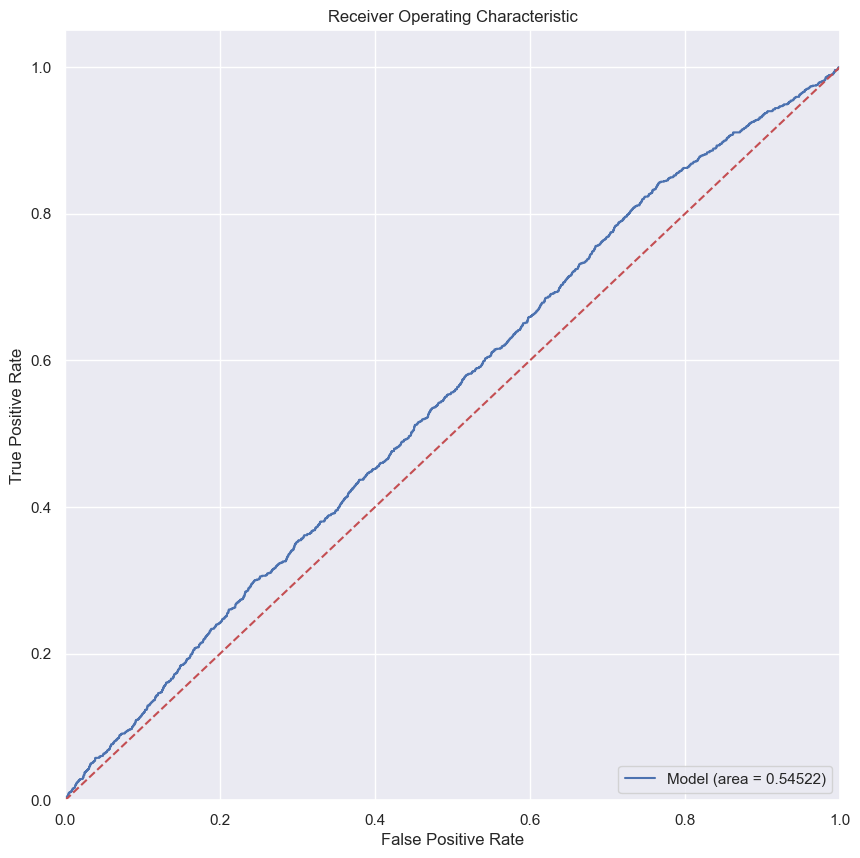

Accuracy on validation set: 0.52432306
True Neg: 61894 	 False Pos: 56179
False Neg: 545 	 True Pos: 631
Precision on validation set: 0.01110720
Recall on validation set: 0.53656463
F1-Score on validation set: 0.02176387


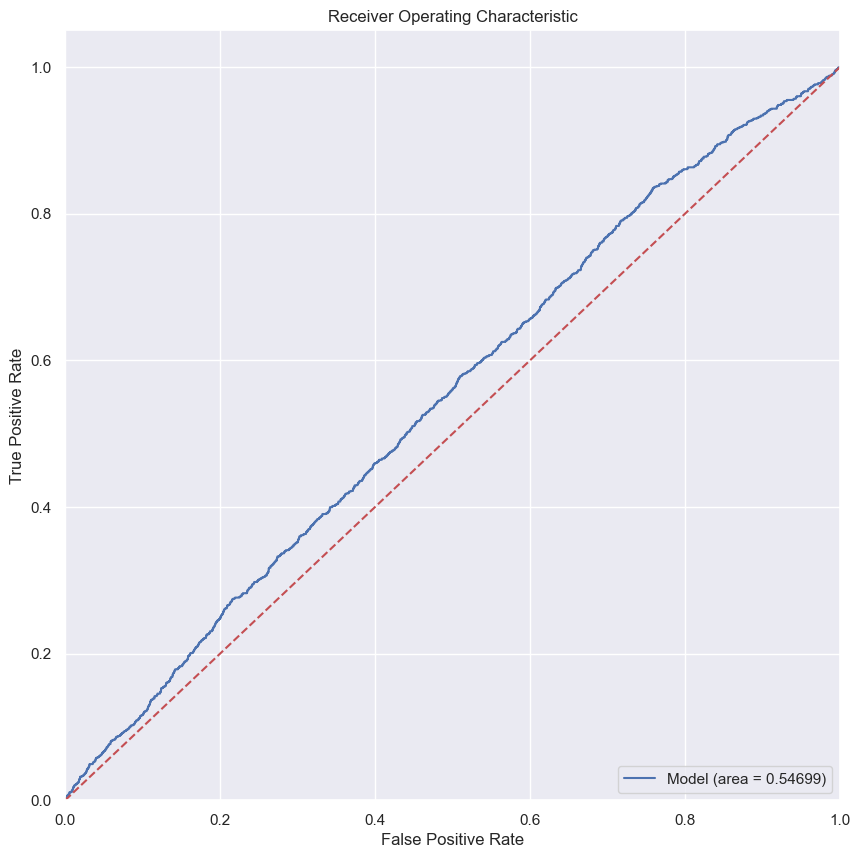

In [48]:
# base model
logs = LogisticRegression()
evaluate_model(logs, X_train[['velocity_6h', 'velocity_24h', 'velocity_4w', 'zip_count_4w']], y_train, X_valid[['velocity_6h', 'velocity_24h', 'velocity_4w', 'zip_count_4w']], y_valid)
evaluate_model(logs, np.hstack([Xt1, Xt2]), y_train, np.hstack([Xt_valid1, Xt_valid2]), y_valid)

#### sum/avg

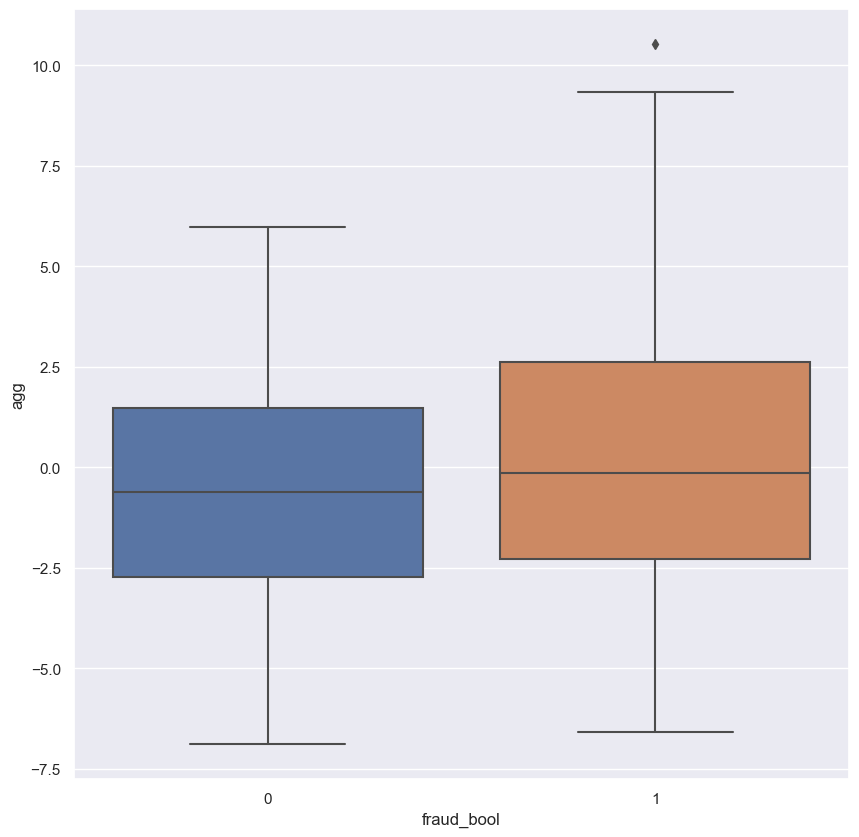

In [49]:
velo_cols = ['payment_type_AA', 'intended_balcon_amount', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_months_count', 'bank_branch_count_8w']
pipe = Pipeline([('scale', StandardScaler())])
scaled = pipe.fit_transform(X_train[velo_cols])
sums = scaled.sum(axis=1)
sums = pd.concat([pd.DataFrame(sums, columns=['agg']), y_train], axis=1, join='inner')
p = sns.boxplot(x=sums['fraud_bool'], y=sums['agg'])

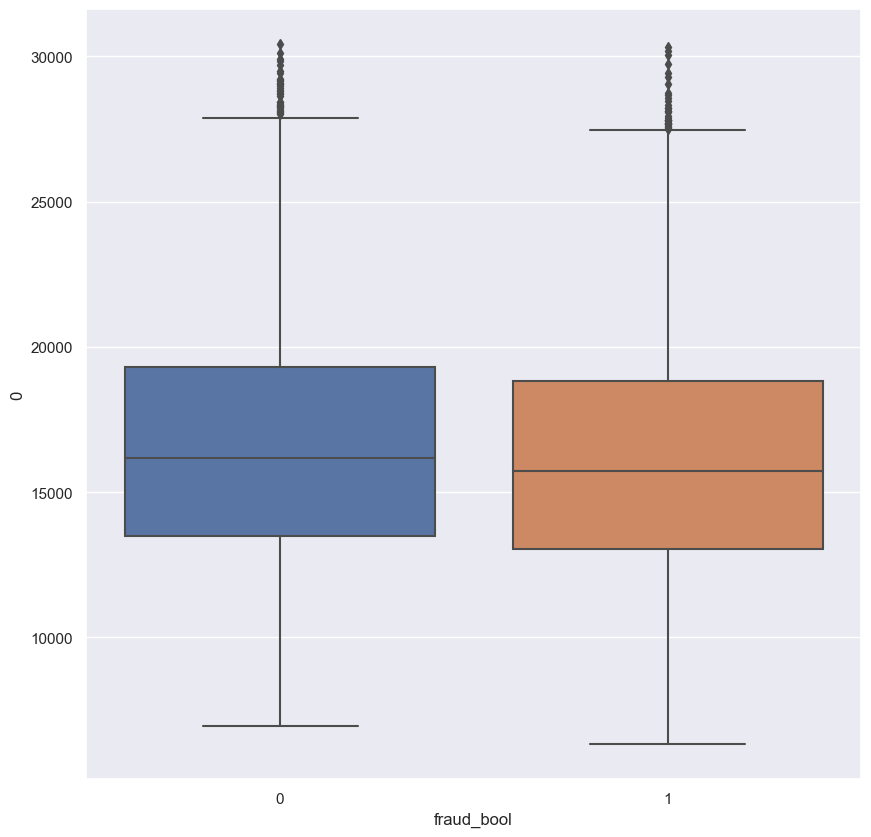

In [50]:
velo_cols = ['payment_type_AA', 'intended_balcon_amount', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_months_count', 'bank_branch_count_8w']
sums = X_train[velo_cols].sum(axis=1)
sums = pd.concat([sums, y_train], axis=1, join='inner')
p = sns.boxplot(x=sums['fraud_bool'], y=sums[0])

#### PLS-DA

In [64]:
from sklearn.cross_decomposition import PLSRegression
pls_binary = PLSRegression()
pls_binary.fit(X_train[['velocity_6h', 'velocity_24h', 'velocity_4w', 'zip_count_4w']], y_train)

pls_ypred_raw = pls_binary.predict(X_valid[['velocity_6h', 'velocity_24h', 'velocity_4w', 'zip_count_4w']])[:,0]
pls_ypred = (pls_binary.predict(X_valid[['velocity_6h', 'velocity_24h', 'velocity_4w', 'zip_count_4w']])[:,0] > 0.5).astype('uint8')

print('Accuracy of PLS-DA classifier on test set: {:.2f}'.format(accuracy_score(y_valid, pls_ypred)))
print('Precision of PLS-DA classifier on test set: {:.2f}'.format(precision_score(y_valid, pls_ypred)))
print('Recall of PLS-DA classifier on test set: {:.2f}'.format(recall_score(y_valid, pls_ypred)))

Accuracy of PLS-DA classifier on test set: 0.53
Precision of PLS-DA classifier on test set: 0.01
Recall of PLS-DA classifier on test set: 0.53


### Proposed Credit Limit vs Credit Score

#### PCA

/Users/wye/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


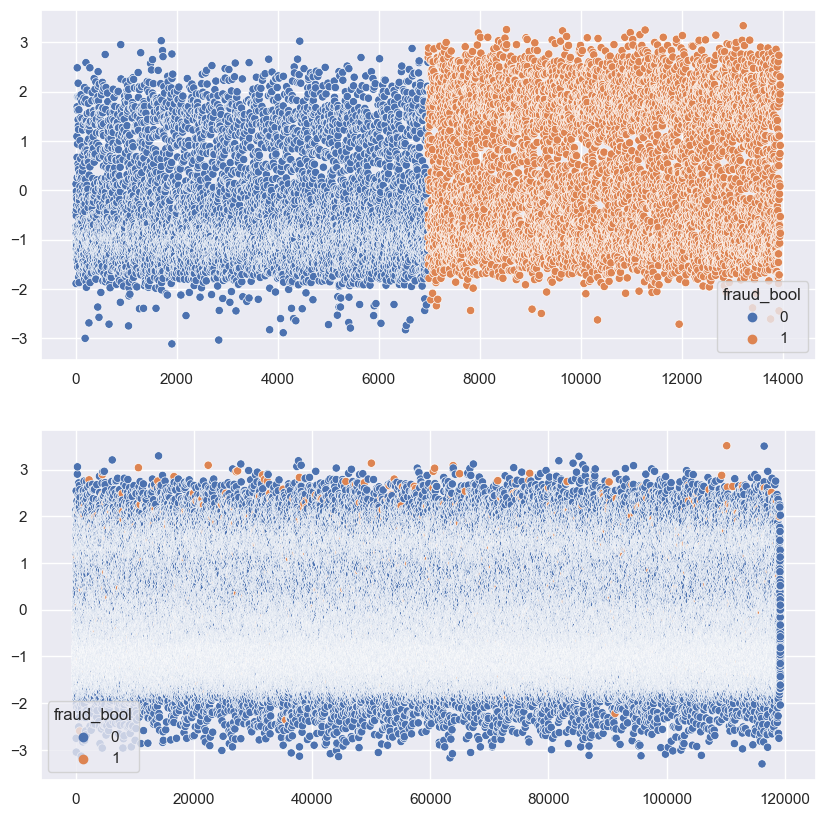

[0.83135479 0.16864521]


In [65]:
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X_train[['proposed_credit_limit', 'credit_risk_score']])
Xt_valid = pipe.transform(X_valid[['proposed_credit_limit', 'credit_risk_score']])

plt.subplot(2, 1, 1)
sns.scatterplot(x=range(len(y_train['fraud_bool'])), y=Xt[:,0], hue=y_train['fraud_bool'])
plt.subplot(2, 1, 2)
sns.scatterplot(x=range(len(y_valid['fraud_bool'])), y=Xt_valid[:,0], hue=y_valid['fraud_bool'])
plt.show()

print(pipe.named_steps['pca'].explained_variance_ratio_)

Accuracy on validation set: 0.69992201
True Neg: 82795 	 False Pos: 35278
False Neg: 506 	 True Pos: 670
Precision on validation set: 0.01863803
Recall on validation set: 0.56972789
F1-Score on validation set: 0.03609525


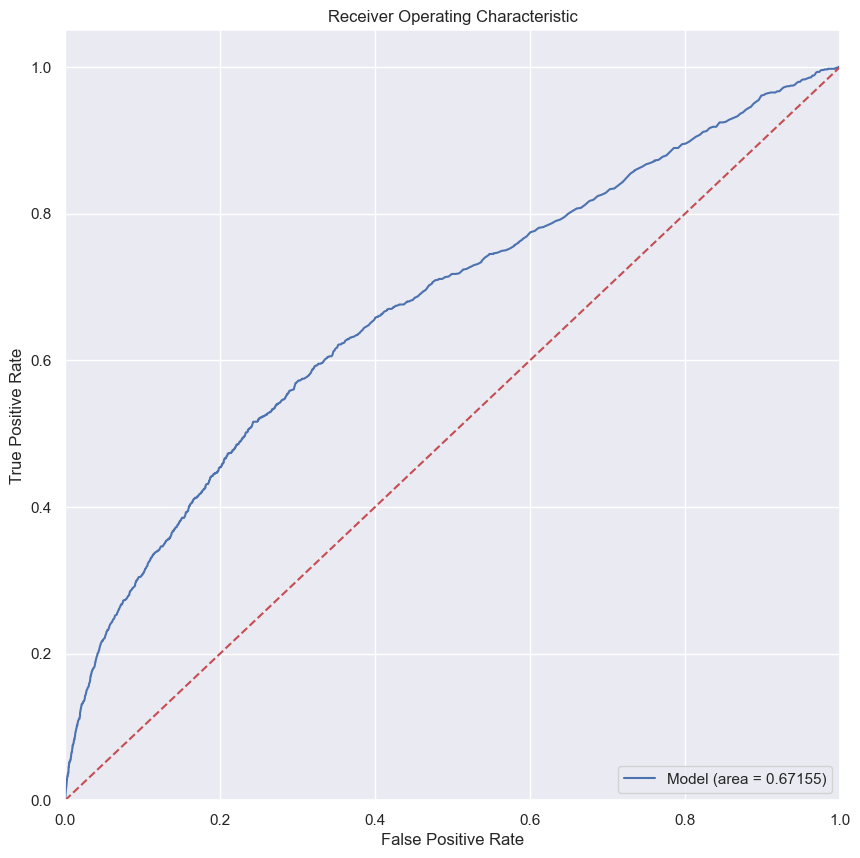

Accuracy on validation set: 0.70612751
True Neg: 83552 	 False Pos: 34521
False Neg: 523 	 True Pos: 653
Precision on validation set: 0.01856485
Recall on validation set: 0.55527211
F1-Score on validation set: 0.03592847


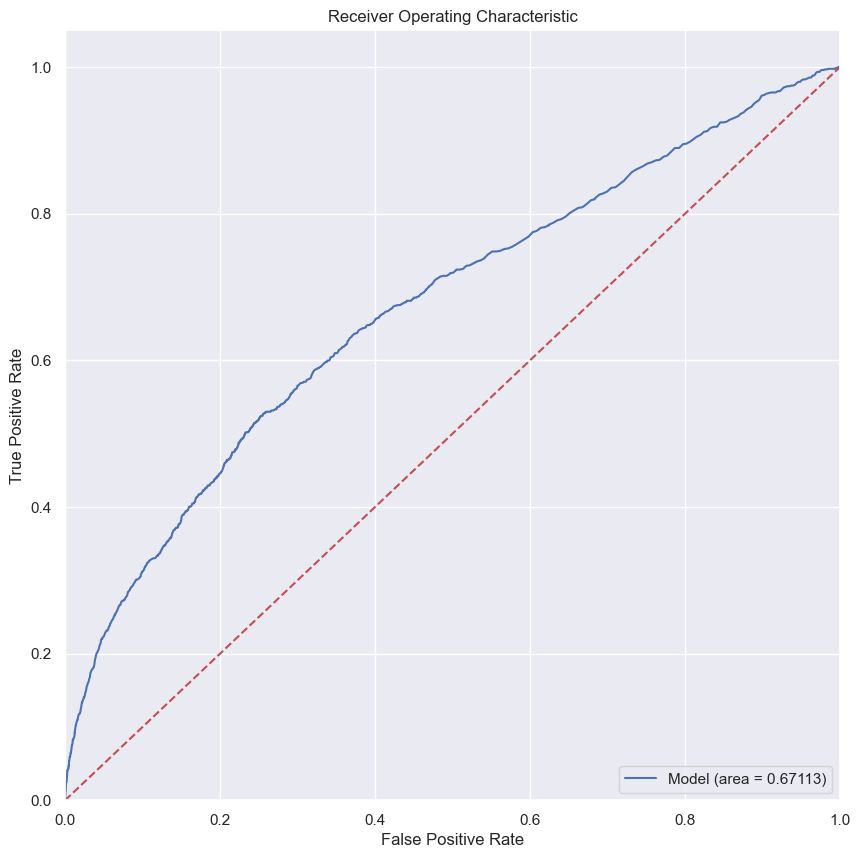

In [66]:
# base model
logs = LogisticRegression()
evaluate_model(logs, X_train[['proposed_credit_limit', 'credit_risk_score']], y_train, X_valid[['proposed_credit_limit', 'credit_risk_score']], y_valid)

# with PCA-transformed
evaluate_model(logs, Xt[:,0].reshape(-1, 1), y_train, Xt_valid[:,0].reshape(-1, 1), y_valid)

### payment_type_AA', 'intended_balcon_amount'

In [ ]:
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X_train[['payment_type_AA', 'intended_balcon_amount', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_months_count', 'bank_branch_count_8w']])
Xt_valid = pipe.transform(X_valid[['payment_type_AA', 'intended_balcon_amount', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_months_count', 'bank_branch_count_8w']])

plt.subplot(2, 1, 1)
sns.scatterplot(x=Xt[:,0], y=Xt[:,1], hue=y_train['fraud_bool'])
plt.subplot(2, 1, 2)
sns.scatterplot(x=Xt_valid[:,0], y=Xt_valid[:,1], hue=y_valid['fraud_bool'])
plt.show()

print(pipe.named_steps['pca'].explained_variance_ratio_)